<center><h1> Wine Classification (3 classes)

Objective:

Is to create:
    - A classification algorithm for wine (Use pipelines)
    - Use skplot
    - Standarization + PCA + Clustering => Do 
    - [Optional] Use tensorflow
 

<h2> Load Data

In [137]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [90]:
# Load data
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

<h2> Preprocessing

In [91]:
# Split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
# Standardize
from sklearn.preprocessing import StandardScaler
def preprocess(x):
    return StandardScaler().fit_transform(x)

X_train = preprocess(X_train)    
X_test = preprocess(X_test)    

<h2> Sklearn Classification

In [94]:
# Train model
from sklearn.ensemble import ExtraTreesClassifier
etcl = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
etcl.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [96]:
# Predict
y_pred = etcl.predict(X_test)
y_pred_proba = etcl.predict_proba(X_test)

In [101]:
# Get performance results
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))
print('Accuracy Obtained = ', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Accuracy Obtained =  1.0


<h2> TensorFlow classification

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [131]:
# Convert labels to categorical one-hot encoding
one_hot_y_train = to_categorical(y_train, num_classes=output_dim)
one_hot_y_test = to_categorical(y_test, num_classes=output_dim)

In [149]:
# parameters
input_dim = X_train.shape[1]
output_dim = len(set(y_train))

# keras model
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(output_dim, activation='softmax'))

# compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit
history = model.fit(X_train,one_hot_y_train, epochs=200, batch_size=60, validation_split=0.33, verbose=False)

# predict
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba)

In [150]:
# Performance metrics
score = model.evaluate(X_test, one_hot_y_test)

59/59 [==============================] - 0s 290us/sample - loss: 0.3544 - acc: 1.0000


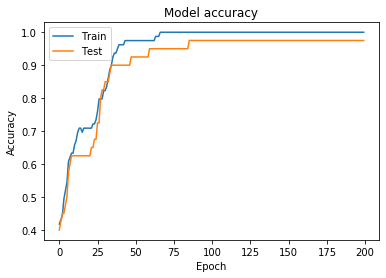

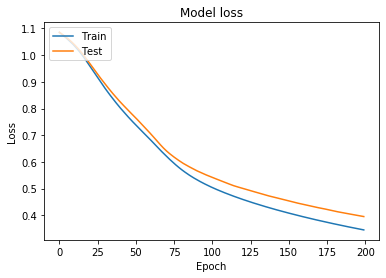

In [151]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<h1> Data Exploration

In [124]:
# Number of classes
set(y_train)

{0, 1, 2}

In [11]:
# Check data
pdX = pd.DataFrame(X, columns=feature_names)
pdX.head(9)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0


In [12]:
# Describe
pdX.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


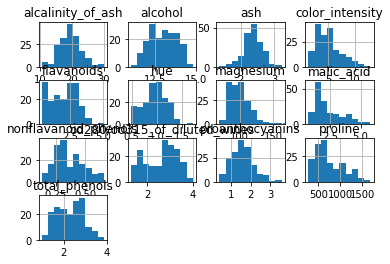

In [152]:
# Data Distributions
_ = pdX.hist()

In [38]:
# Median of all absolute deviations
def MAD(x):
    mu = x.median()
    return (x - mu).median()

In [155]:
# Estimate the amount of deviations
dev = pdX.apply(MAD,axis=1).sum()
print('MAD indicator = ',dev)

MAD indicator =  0.0


In [60]:
# Check missings
pdX.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [61]:
# Check types
pdX.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [63]:
# Check label
set(y)

{0, 1, 2}